In [58]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [59]:
image_directory = 'data/cell-seg-data/test_fluo/img/'
annotation_file = 'data/cell-seg-data/test_fluo/fluo.json'

In [60]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [61]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
background cell

Custom COCO supercategories: 
background cell


In [62]:
category_ids = example_coco.getCatIds(catNms=['cell'])
image_ids = example_coco.getImgIds(catIds=1)
# image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0] # pick a random img
image_data = example_coco.loadImgs(image_ids[0])[0] # alwasy pick the first img

In [63]:
print("cat id: ", category_ids)
print("img id: ", image_ids)
print('data of the 1st img:')
print(image_data)


cat id:  [1]
img id:  [1]
data of the 1st img:
{'id': 1, 'file_name': 'IXMtest_F12_s8_w1DBD80811-5297-4415-ACD1-EC9286BE76A4.png', 'width': 520, 'height': 696, 'date_captured': '2023-04-23 23:21:54.427851', 'license': 1, 'coco_url': '', 'flickr_url': ''}


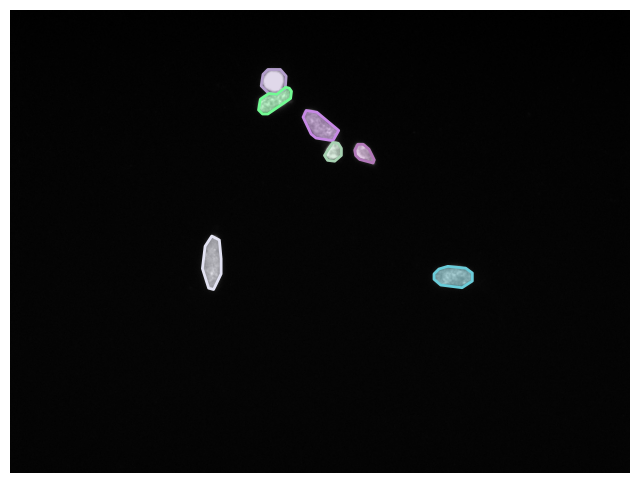

In [64]:
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)